In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
image = cv2.imread('PekuthermKamera2Front_112.jpeg')
image_path = cv2.imread('PekuthermKamera2Front_112.jpeg')

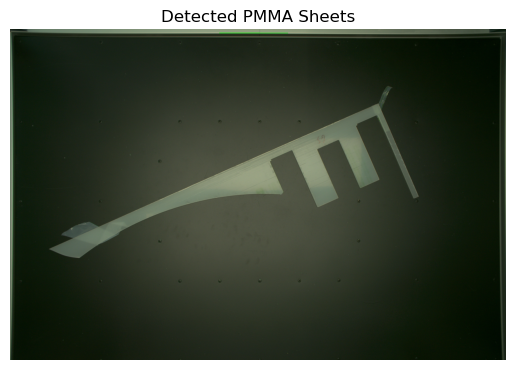

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('PekuthermKamera2Front_112.jpeg', cv2.IMREAD_COLOR)

# Check if the image was loaded successfully
if image is None:
    raise FileNotFoundError("Image file not found.")

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to create a binary image
_, binary = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

# Perform connected component analysis
_, labels, stats, centroids = cv2.connectedComponentsWithStats(binary, connectivity=8)

# Create a copy of the original image for visualization
output_image = image.copy()

# Iterate through each component (excluding background)
for i, stat in enumerate(stats[1:], start=1):
    # Extract the bounding box coordinates
    x, y, w, h, area = stat[:5]
    
    # Filter out small components (adjust threshold as needed)
    if area < 100:
        continue
    
    # Draw bounding box around the component
    cv2.rectangle(output_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Convert BGR image to RGB for matplotlib display
output_image_rgb = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)

# Display the result using matplotlib
plt.imshow(output_image_rgb)
plt.title('Detected PMMA Sheets')
plt.axis('off')
plt.show()


In [4]:
import cv2

# Load the image
image = cv2.imread('PekuthermKamera2Front_112.jpeg')

# Specify the new dimensions (width, height)
new_width = 800
new_height = 600

# Resize the image
resized_image = cv2.resize(image, (new_width, new_height))

# Display the resized image
cv2.imshow('Resized Image', resized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [5]:
image= resized_image

In [9]:
from PIL import Image, ImageFilter
import numpy as np

# Assuming 'image' is your NumPy array
# Convert NumPy array to PIL Image
image_pil = Image.fromarray(image)

# Apply FIND_EDGES filter
image_filtered = image_pil.filter(ImageFilter.FIND_EDGES)

# Save the filtered image
image_filtered.save('new_name.png')


In [10]:
import cv2
# Replace 'your_image.jpg' with the path to your image
newimage = image_filtered 

In [11]:

# Get image dimensions
height, width = newimage.shape[:2]

# Define the border size (50 pixels)
border_size = 50

# Crop the image to remove the 50-pixel border
cropped_image =newimage[border_size:height-border_size, border_size:width-border_size]

# Display the cropped image
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


AttributeError: 'Image' object has no attribute 'shape'

In [ ]:
import cv2
import numpy as np
import os
import pandas as pd
from tqdm import tqdm

# Define the path to the folder containing the images
folder_path = 'front'

# Get a list of all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpeg')]

# Initialize a list to store the data
data = []

# Function to process each image
def process_image(image_path):
    # Load the image
    image = cv2.imread(image_path)
    
    # Resize the image
    new_width = 800
    new_height = 600
    resized_image = cv2.resize(image, (new_width, new_height))
    
    # Get image dimensions
    height, width = resized_image.shape[:2]
    
    # Define the border size (50 pixels)
    border_size = 50
    
    # Crop the image to remove the 50-pixel border
    cropped_image = resized_image[border_size:height-border_size, border_size:width-border_size]
    
    # Convert the image to grayscale
    blurred = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
    
    # Threshold the image to create a binary image
    _, thresh = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY)
    
    # Find contours in the binary image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Set a minimum area threshold to filter out small contours
    min_area = 0.7  # Adjust this value according to your needs
    
    # Filter out small contours
    filtered_contours = [contour for contour in contours if cv2.contourArea(contour) >= min_area]
    
    # Combine all filtered contours to find the bounding box
    if filtered_contours:
        all_contours = np.vstack(filtered_contours)
        
        # Get the bounding rectangle for all filtered contours
        x, y, w, h = cv2.boundingRect(all_contours)
        
        # Store the image name (without extension) and dimensions in the data list
        image_id = os.path.splitext(os.path.basename(image_path))[0]
        data.append({'ID': image_id, 'Width': w, 'Height': h})
        
        # Draw the bounding rectangle on the image
        cv2.rectangle(cropped_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
        # Prepare the measurement text
        text = f'Width: {w}px, Height: {h}px'
        
        # Choose a font and get the text size
        font = cv2.FONT_HERSHEY_SIMPLEX
        text_size = cv2.getTextSize(text, font, 0.5, 2)[0]
        
        # Set the text position
        text_x = x + (w - text_size[0]) // 2
        text_y = y - 10 if y - 10 > 10 else y + 10 + text_size[1]
        
        # Draw the text background rectangle
        cv2.rectangle(cropped_image, (text_x, text_y - text_size[1] - 5), (text_x + text_size[0], text_y + 5), (0, 255, 0), -1)
        
        # Put the text on the image
        cv2.putText(cropped_image, text, (text_x, text_y), font, 0.5, (0, 0, 0), 2)
    else:
        print("No contours found with area greater than the minimum area threshold.")
    
    return cropped_image

# Process each image in the folder
for image_file in tqdm(image_files, desc="Processing images"):
    image_path = os.path.join(folder_path, image_file)
    process_image(image_path)

# Convert the data list to a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


Processing images:  21%|████████████▋                                               | 232/1092 [01:03<03:57,  3.63it/s]

No contours found with area greater than the minimum area threshold.


Processing images:  23%|█████████████▌                                              | 247/1092 [01:07<03:52,  3.64it/s]

No contours found with area greater than the minimum area threshold.


Processing images:  31%|██████████████████▋                                         | 341/1092 [01:33<03:29,  3.58it/s]

No contours found with area greater than the minimum area threshold.


Processing images:  75%|████████████████████████████████████████████▊               | 815/1092 [03:50<01:16,  3.61it/s]

In [8]:
import cv2
import numpy as np
from itertools import combinations

# Resize the image to 1200x800
cropped_image = cv2.resize(cropped_image, (1200, 800))

# Check if the image is loaded properly
if cropped_image is None:
    print("Error loading image")
else:
    # Convert the image to grayscale
    gray = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)

    # Threshold the image to create a binary image
    _, thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

    # Find contours in the binary image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Collect center points of bounding boxes
    points = []
    for contour in contours:
        # Calculate the perimeter of the contour
        perimeter = cv2.arcLength(contour, True)
        
        # Approximate the contour to get its shape
        approx = cv2.approxPolyDP(contour, 0.02 * perimeter, True)
        
        # Get the bounding rectangle for the contour
        x, y, w, h = cv2.boundingRect(contour)
        
        # Draw the bounding rectangle on the image
        cv2.rectangle(cropped_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
        # Collect the center points of bounding boxes
        cx, cy = x + w//2, y + h//2
        points.append((cx, cy))
        cv2.circle(cropped_image, (cx, cy), 5, (0, 0, 255), -1)

    # Calculate distances between all pairs of points
    distances = []
    connected_points = set()
    for (i, point1), (j, point2) in combinations(enumerate(points), 2):
        if point1 not in connected_points and point2 not in connected_points:
            distance = np.linalg.norm(np.array(point1) - np.array(point2))
            if 100 < distance < 110:
                distances.append((distance, point1, point2))
                connected_points.add(point1)
                connected_points.add(point2)

    # Draw lines between filtered pairs of points and display distances
    for distance, point1, point2 in distances:
        cv2.line(cropped_image, point1, point2, (255, 0, 0), 2)
        mid_point = ((point1[0] + point2[0]) // 2, (point1[1] + point2[1]) // 2)
        cv2.putText(cropped_image, f'{distance:.2f} px', mid_point, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Display the image with bounding rectangles and filtered distances
    cv2.imshow("Detected Objects with Filtered Distances", cropped_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
